<a href="https://colab.research.google.com/github/visagu55/GLM2018/blob/master/Copia_de_Test_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ambiente

In [ ]:
#!python --version

In [ ]:
#!pip install Cython

In [ ]:
#!pip install feather-format

In [ ]:
#!pip install install scipy

In [ ]:
# !pip install scikit-learn
# !pip install matplotlib
# !pip install jupyter
# !pip install fake-factory
# !pip install flake8
# !pip install seaborn

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
## Paquete para mejorar la estética de matplolib
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
import feather
iris_df = feather.read_dataframe('/content/gdrive/My Drive/Colab Notebooks/iris.feather')
iris_df.head()


# Scikit-learn


## Ejemplo

In [ ]:
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
print(X_iris.shape)

(150, 4)


In [ ]:
y_iris = iris['species']
print(y_iris.shape)

(150,)


## <center> Estimador API <center>

## Manual de supervivencia

Escoje los hiper-parámetros del modelo
Prepara el dataset en features matrix y el vector target
Divide el dataset en train y test
Aplica el algoritmo a tus datos de entrenamiento
Aplica el algoritmo a tus datos de prueba
Evalúa el modelo
Aplica el modelo en nuevos datos

1.   Escoje un modelo
2.   Новый пункт



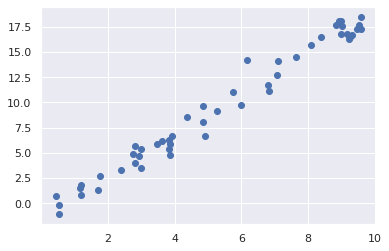

In [ ]:
rng = np.random.RandomState(5432)
x = 10 * rng.rand(50)
y = 2 * x  - 1 + rng.randn(50)
plt.scatter(x,y)

## Ejemplo: Supervised Learning

In [ ]:
## 1.  Escoje un modelo
from sklearn.linear_model import LinearRegression

## 2. Escoje los hiper-parametros
## Ve la documentacion:
## ?LinearRegression
modelo = LinearRegression(fit_intercept = True)

In [ ]:
## 3.Prepara el /dataset/ en /features matrix/ y el vector /target/
## x no es una matriz, es un vector, i.e. su shape es (50,)
X = x[:, np.newaxis]
#X
print(X.shape)

(50, 1)


In [ ]:
## 4. Divide el dataset en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
## 5. Aplica el algoritmo a tu datos de entrenamiento
modelo.fit(X_train, y_train)

print("Коэффициент: {}".format(modelo.coef_))

print("Пересечение: {}".format(modelo.intercept_))

Коэффициент: [2.01906752]
Пересечение: -1.308045451824075


In [ ]:
## 6. Aplica el algoritmo a tus datos de prueba
y_from_model = modelo.predict(X_test)
## 7. Evalúa el modelo
modelo.score(X_test, y_test) ## Devuelve el R^2

0.9852254371084518

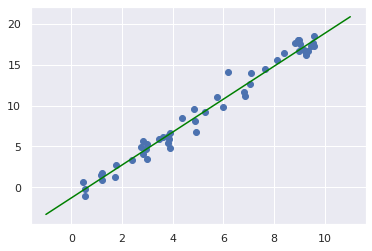

In [ ]:
## 8. Aplica el modelo en nuevos datos
x_new = np.linspace(-1, 11)

X_new = x_new[:, np.newaxis]
y_new = modelo.predict(X_new)
## Graficamos el modelo y los datos
plt.scatter(x, y)
plt.plot(X_new, y_new, c='green')

## Ejemplo: Transformers

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

print("Media: %s " % X_train.mean(axis=0))
print("Desviacion estandar: %s " % X_train.std(axis=0))

Media: [3.79859649e+00 1.15224274e+01 1.11798681e+01 7.38786280e-02
 5.55498153e-01 6.26070185e+00 6.94976253e+01 3.78652902e+00
 9.76517150e+00 4.15382586e+02 1.84976253e+01 3.57671953e+02
 1.28251715e+01] 
Desviacion estandar: [9.16950612e+00 2.33700618e+01 6.98009407e+00 2.61573271e-01
 1.15593284e-01 7.10601026e-01 2.76526480e+01 2.13845426e+00
 8.81023935e+00 1.69422701e+02 2.16171281e+00 8.90818007e+01
 7.17350539e+00] 


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_scaled = scaler.transform(X_train)

print("Media: %s " % X_scaled.mean(axis=0))
print("Desviacion estandar: %s " % X_scaled.std(axis=0))


Media: [-3.60602782e-16 -1.42366330e-16  3.12180654e-15  1.38265242e-16
 -2.30481128e-15  4.68519975e-15 -1.33724752e-16  6.67305554e-16
  1.33138883e-16  1.79861989e-16  2.62220618e-14  4.97967249e-15
  3.55348263e-16] 
Desviacion estandar: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 


## Ejemplo: Reducción de dimensiones

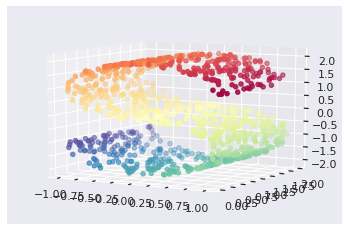

In [ ]:
from sklearn.datasets import make_s_curve

X, color= make_s_curve(n_samples=1000)

from mpl_toolkits.mplot3d import Axes3D

plt.close()

fig = plt.figure()

ax = plt.axes(projection = '3d')

ax.scatter3D(X[:,0], X[:,1], X[:,2], c=color, cmap=plt.cm.Spectral)
ax.view_init(10, -60)

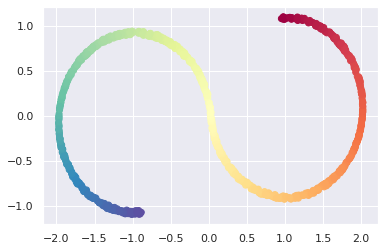

In [ ]:
## Linear transformers en el paquete decomposition
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X)
X_pca = pca.transform(X)
plt.close()
plt.scatter(X_pca[:,0], X_pca[:,1], c=color, cmap=plt.cm.Spectral)

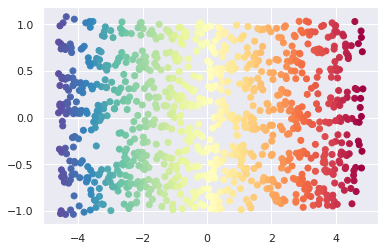

In [ ]:
## No linear transformers en el paquete  manifold
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors = 20)
iso.fit(X)
X_iso = iso.transform(X)

plt.close()
plt.scatter(X_iso[:,0], X_iso[:,1], c=color, cmap=plt.cm.Spectral)

plt.savefig('/content/gdrive/My Drive/Colab Notebooks/s-figure-isomap.png')

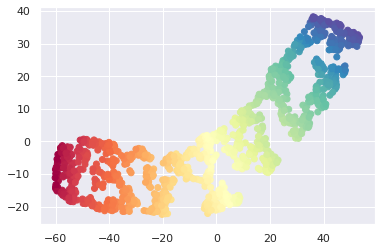

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE()

## t-sne no tiene una API estándar :/
## Esto falla:
## tsne.fit(X)
## X_tsne = tsne.transform(X)
## BOOOM!!!
## Se puede arreglar con:
## X_tsne = tsne.embedding_

X_tsne = tsne.fit_transform(X)

plt.close()
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=color, cmap=plt.cm.Spectral)

plt.savefig('/content/gdrive/My Drive/Colab Notebooks/s-figure-tsne.png')

## Ejemplo final: Dígitos

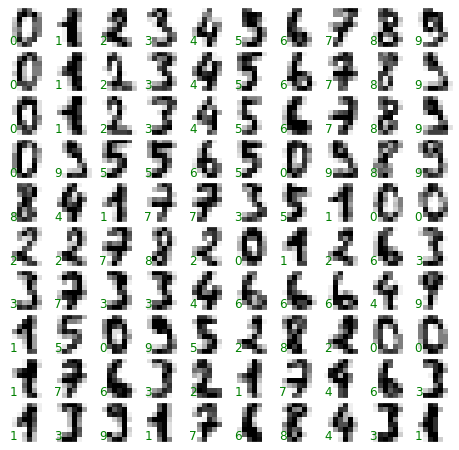

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

digits.images.shape

import matplotlib.pyplot as plt

fig, axes = plt.subplots(10,10, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [ ]:
X = digits.data
print("Dimensiones de los features: {}".format(X.shape))

y = digits.target
print("Dimensiones del target: {}".format(y.shape))

Dimensiones de los features: (1797, 64)
Dimensiones del target: (1797,)


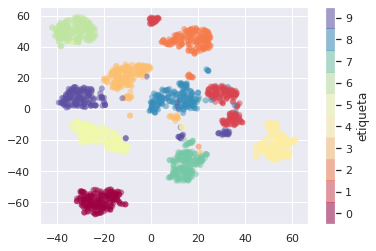

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE()

X_projected = tsne.fit_transform(X)

X_projected.shape

plt.close()

plt.scatter(X_projected[:,0], X_projected[:,1], 
            c=y,edgecolor = 'none',
            alpha = 0.5,
            cmap = plt.cm.get_cmap('Spectral', 10))

plt.colorbar(label = 'etiqueta', ticks = range(10))

plt.clim(-0.5, 9.5)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
y_model = model.predict(X_test)


## Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_test, y_model)))

Accuracy: 0.9777777777777777


In [ ]:
X_train.shape

(1347, 64)

In [ ]:
## Métricas clasicas de Clasificadores
from sklearn import metrics
print(metrics.classification_report(y_model, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.95      0.97        44
           2       0.95      1.00      0.98        42
           3       0.98      1.00      0.99        44
           4       0.97      1.00      0.99        37
           5       0.96      0.96      0.96        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.96      0.98      0.97        47
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Text(89.18, 0.5, 'Valor real')

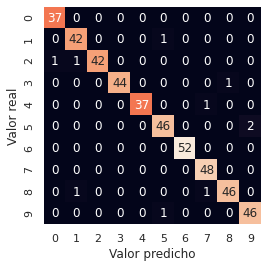

In [ ]:
## Matriz de confusión
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model)

plt.close()

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

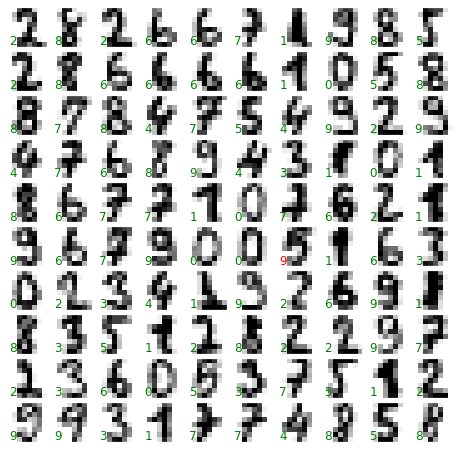

In [ ]:
## O visualmente

plt.close()

fig, axes = plt.subplots(10,10, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test.reshape(450,8,8)[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == y_model[i]) else 'red')

***

### **Ejercicio:** 
Inténtalo con $PCA$ e $Isomap$ ¿Cual divide mejor este dataset?


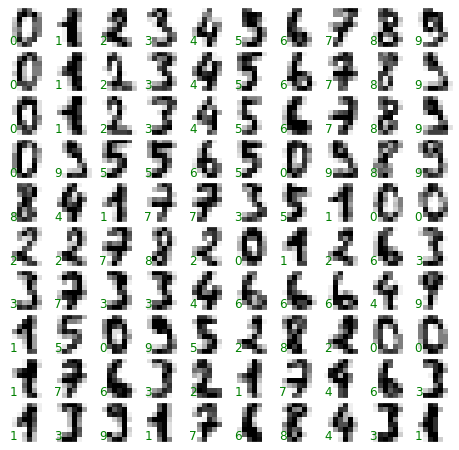

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

digits.images.shape

import matplotlib.pyplot as plt

fig, axes = plt.subplots(10,10, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [ ]:
# Cargando los datos
X = digits.data
print("Dimensiones de los features: {}".format(X.shape))

y = digits.target
print("Dimensiones del target: {}".format(y.shape))

Dimensiones de los features: (1797, 64)
Dimensiones del target: (1797,)


In [ ]:
# Vamos a estandarizar nuestro X=digits
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)

X_scaled= scaler.transform(X)

print("Media: %s " % X_scaled.mean(axis=0))
print("Desviacion estandar: %s " % X_scaled.std(axis=0))


Media: [ 0.00000000e+00 -2.56086502e-16 -2.34771702e-16 -3.05326777e-16
  1.39689163e-16 -3.16941798e-16 -9.59598443e-16  6.06946633e-16
 -4.62368967e-16  7.55084971e-17 -5.33796713e-17  5.71483749e-17
  4.52862258e-17 -1.49512505e-17  8.96580775e-16 -2.17719863e-16
 -6.87973761e-16 -7.70421876e-17  2.59978769e-16  2.32547550e-16
  1.05878949e-16 -1.40863021e-16 -1.15408826e-16 -2.26477465e-16
  4.51109193e-16  3.79341646e-17 -7.71657517e-17 -9.60092699e-17
 -8.72980041e-17 -1.50624582e-16 -1.05597840e-15 -2.52140175e-16
  0.00000000e+00  3.42148865e-16  1.21710593e-16 -1.07871419e-16
 -2.00606242e-16 -1.09354188e-17 -7.12964591e-17  0.00000000e+00
  3.00716294e-16 -1.74657790e-16  4.03436636e-16  1.92111213e-16
  2.61337974e-17  5.38739275e-17  4.71396866e-17  8.63759074e-16
  2.62048467e-16  3.33128689e-16  8.36528645e-17  1.98775949e-16
  4.61017485e-16  5.01670059e-17  4.71582212e-16 -4.92032063e-16
  2.25353805e-16  3.44125890e-16  5.95269830e-17 -6.11460582e-16
 -5.19092591e-16  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)


In [ ]:
X_train.shape

(1347, 64)

In [ ]:
from sklearn.decomposition import PCA
#Principal component analysis (PCA)
#X_train, y_train
#X_test,y_test
pca_2 = PCA().fit(X_train)
X_train_pca=pca_2.fit(X_train)
X_test_pca=pca_2.fit(X_test)

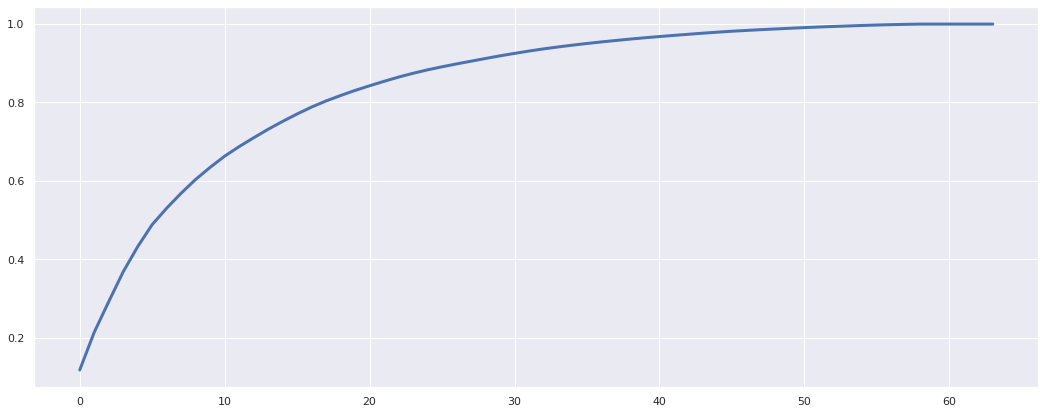

In [ ]:
plt.figure(figsize=(18, 7))
plt.plot(pca_2.explained_variance_ratio_.cumsum(), lw=3)

In [ ]:
for i in range(1,pca_2.n_components_):
  s=np.sum(pca_2.explained_variance_ratio_[:i])
  print("Componentes-{}--Suma Acumulada-{}".format(i,s))

Componentes-1--Suma Acumulada-0.1174891068626096
Componentes-2--Suma Acumulada-0.21373817471105444
Componentes-3--Suma Acumulada-0.2918396879579586
Componentes-4--Suma Acumulada-0.36808700215383067
Componentes-5--Suma Acumulada-0.432266570936187
Componentes-6--Suma Acumulada-0.48845588740617485
Componentes-7--Suma Acumulada-0.5303560200880459
Componentes-8--Suma Acumulada-0.5686944324541298
Componentes-9--Suma Acumulada-0.6038041609234599
Componentes-10--Suma Acumulada-0.6345417906324294
Componentes-11--Suma Acumulada-0.6630674696140023
Componentes-12--Suma Acumulada-0.6874242561671425
Componentes-13--Suma Acumulada-0.7099172470482829
Componentes-14--Suma Acumulada-0.7316288923796469
Componentes-15--Suma Acumulada-0.7517223798915678
Componentes-16--Suma Acumulada-0.7706775668674493
Componentes-17--Suma Acumulada-0.7883825862680808
Componentes-18--Suma Acumulada-0.8039259654362507
Componentes-19--Suma Acumulada-0.8177718469976385
Componentes-20--Suma Acumulada-0.83078406646922
Component

Tomarémos 15 componentes principales para que nos de una información del 75%.

In [ ]:
pca_2_75 = PCA(n_components=15).fit(X_train)
X_train_pca_75=pca_2_75.transform(X_train)
X_test_pca_75=pca_2_75.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC().fit(X_train_pca_75, y_train)
predictions = classifier.predict(X_test_pca_75)

In [ ]:
# Vamos a ver la proporción de los que coinciden
count=0
for i in range(len(predictions)):
  if (predictions[i]==y_test[i]):
    count=count+1

print(count/len(predictions))

0.9711111111111111


Como podemo observar con $15$ componentes pricipales podemos tener una precisión del $97\%$, aproximádamente.

Text(89.18, 0.5, 'Valor real')

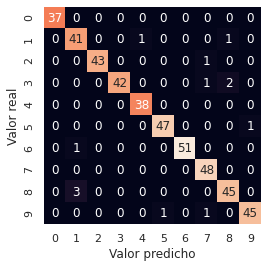

In [ ]:
## Matriz de confusión
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, predictions)

plt.close()

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

## ISOMAP


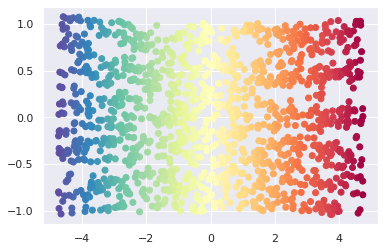

In [ ]:
from sklearn.manifold import Isomap
X_train_2=X_train
X_train_2,color_2= make_s_curve(n_samples=1347)
iso = Isomap(n_neighbors = 20)
iso.fit(X_train_2)
X_iso = iso.transform(X_train_2)

plt.close()
plt.scatter(X_iso[:,0], X_iso[:,1], c=color_2, cmap=plt.cm.Spectral)

plt.savefig('/content/gdrive/My Drive/Colab Notebooks/Ejercicio_digits_isomap.png')

In [ ]:
1-iso.reconstruction_error()

0.9581592550768074


### **Ejercicio:** 
Cambia los hiper-parámetros del RandomForestClassifier, primero disminuye los arboles a $10$, y luego los features a considerar a $sqrt$. ¿Cual resulta mejor?



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
presicion=[]
for i in range(10,1001,10):
  model = RandomForestClassifier(n_estimators=i)
  model.fit(X_train, y_train)
  y_model = model.predict(X_test)
  ## Accuracy
  presicion.append(accuracy_score(y_test, y_model))
  #print("Accuracy: {}".format(accuracy_score(y_test, y_model)))

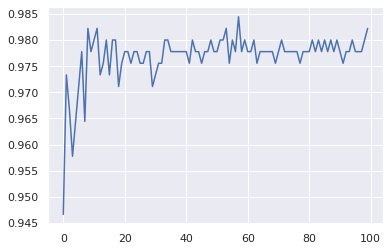

In [ ]:
#presicion
plt.plot(presicion)

In [ ]:
presicion2=[]
for i in range(10,1001,10):
  model = RandomForestClassifier(n_estimators=i,max_features='sqrt')
  model.fit(X_train, y_train)
  y_model = model.predict(X_test)
  ## Accuracy
  presicion2.append(accuracy_score(y_test, y_model))
  #print("Accuracy: {}".format(accuracy_score(y_test, y_model)))

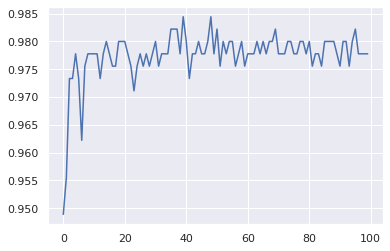

In [ ]:
#presicion
plt.plot(presicion2)

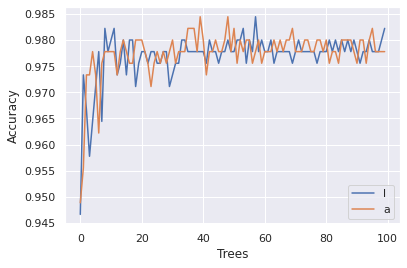

In [ ]:
plt.plot(presicion)
plt.plot(presicion2)
plt.xlabel("Trees")
plt.ylabel("Accuracy")
plt.legend("labels")
plt.show()

In [ ]:
len(presicion2)

100

### **Ejercicio:** 
Cambia de clasificador a $GaussianNB$ ¿Cual resulta mejor para este dataset?

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
count=0
for i in range(X_test.shape[0]):
  if(y_test[i]==y_pred[i]):
    count=count+1

print("Accuracy con GaussianNB: {}".format(count/X_test.shape[0]))

Accuracy con GaussianNB: 0.7777777777777778


# Removing Correlated Features

El conjunto de datos también puede contener características correlacionadas. Dos o más de dos entidades están correlacionadas si están próximas entre sí en el espacio lineal.

La correlación entre las observaciones de salida y las características de entrada es muy importante y dichas características deben conservarse. Sin embargo, si dos o más de dos características están correlacionadas entre sí, transmiten información redundante al modelo y, por lo tanto, solo una de las características correlacionadas debe conservarse para reducir el número de características.

In [ ]:
#importing libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Loading the dataset
x = load_breast_cancer()
df = pd.DataFrame(x.data, columns = x.feature_names)

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 30)

In [ ]:
# La entrada : data frame con las variables.
# La salida : nueva tabla con reducción de columnas.

# Función que nos imprime el heatmap con las correlaciones y nos regresa
# la matriz de correlaciones
def corr_filter(data_frame, level_correlation):
  plt.figure(figsize=(12,10))
  cor = data_frame.corr()
  kot = cor[(cor>=level_correlation)]
  kot2= cor[(cor<=-level_correlation)]
  #sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
  sns.heatmap(kot, annot=True, cmap=plt.cm.Greens)
  sns.heatmap(kot2, annot=True, cmap=plt.cm.Greens)
  plt.show()
  return cor

# Función que selecciona columnas que están correlacionadas con un nivel de
# correlación.
def correlated_column_search(correlacion,l):
  N=len(correlacion.iloc[:,0])
  rows=[]
  columns=[]
  for i in range(N):
    for j in range(N):
      if ((i>j)& (correlacion.iloc[i,j]>l) & (correlacion.iloc[i,j]!=1.0)) :
        #print("i={},j={}".format(cor.columns[i],cor.columns[j]))
        rows.append(correlacion.columns[i])
        columns.append(correlacion.columns[j])
  return columns

# Función que nos elimina las columnas que tienen un nivel de correlación alto.
def new_dataframe(df,columnas):
  output = []
  for x in columnas:
    if x not in output:
      output.append(x)
  df2=df.drop(columns=output)
  return df2

In [ ]:
# Función que reune las funciones anteriores y nos regresa la tabla ya limpia 
# , es decir, con las columnas que no están correlacionada.
def Correlation_Filtering(db,level):
  print("*****************Nivel de Correlacion: {}*****************".format(level))
  n_columns_original=db.shape[1]
  table=new_dataframe(db,correlated_column_search(corr_filter(db,level),level))
  corr_filter(table,level)
  n_columns_new=table.shape[1]
  print("Cantidad de columnas borradas: {}".format(n_columns_original-n_columns_new))
  display(table)
  return table
  


*****************Nivel de Correlacion: 0.5*****************


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


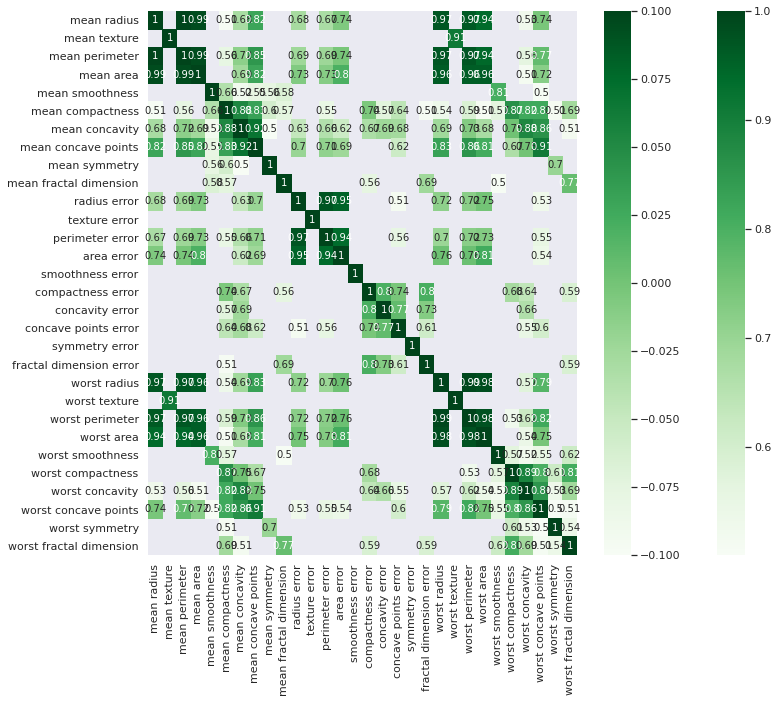

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


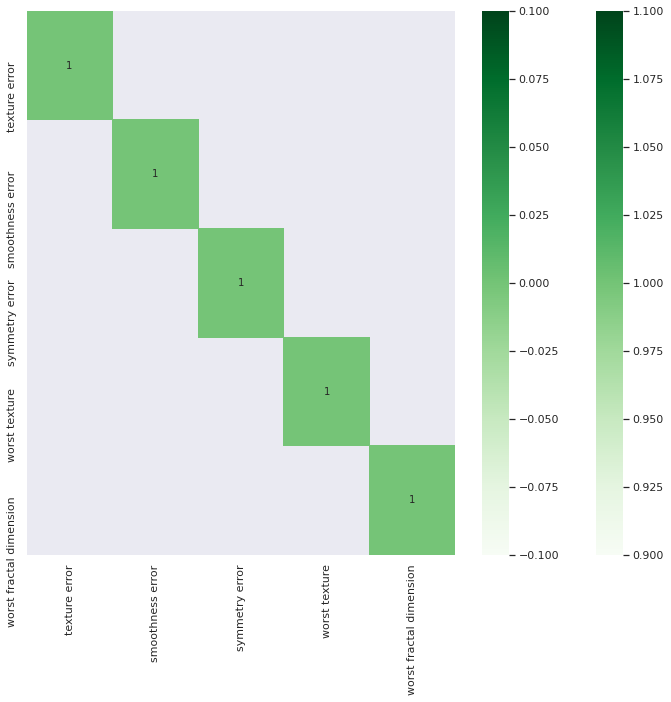

Cantidad de columnas borradas: 25


,texture error,smoothness error,symmetry error,worst texture,worst fractal dimension
0,0.9053,0.006399,0.03003,17.33,0.11890
1,0.7339,0.005225,0.01389,23.41,0.08902
2,0.7869,0.006150,0.02250,25.53,0.08758
3,1.1560,0.009110,0.05963,26.50,0.17300
4,0.7813,0.011490,0.01756,16.67,0.07678
...,...,...,...,...,...
564,1.2560,0.010300,0.01114,26.40,0.07115
565,2.4630,0.005769,0.01898,38.25,0.06637
566,1.0750,0.005903,0.01318,34.12,0.07820
567,1.5950,0.006522,0.02324,39.42,0.12400


In [ ]:
# Prueba
New_table_x=Correlation_Filtering(df,0.5)

# Low variability

In [ ]:
import numpy as np

def low_variability(X, threshold):
    '''
    Elimina las variables que tengan “baja variabilidad”, que sean menores a cierto threeshold
    
    args:
        X: matriz de características
        threshold: umbral de iqr a partir del cual se seleccionan variables
    return:
        Matriz de características (X) seleccionadas
    '''
    
    ind = []
    for i in range(X.shape[1]):    
        q3, q1 = np.percentile(X[:,i], [75 ,25])
        iqr = q3 - q1
        if iqr>threshold:
            ind.append(i)
    return X[:,ind]

# Fast correlation-based filtering

In [ ]:
def fast_correlation(x,y,tolerancia):
    '''
    Esta función implementa el algoritmo fast correlation based filtering, tomando aquéllas columnas con mayor
    correlacion con la variable de respuesta, y de las variables resultantes elimina aquellas con nivel de correlación 
    alto entre ellas
    
    Los parámetros de entrada de esta función son los siguientes:
    x: dataframe,
    y: variable de respuesta,
    tolerancie: umbral para la correlación
    
    Salida:
    Dataframe conteniendo únicamente las variables seleccionadas
    '''   
    #Juntando los datos en un solo data frame incluyendo la variable de respuesta.
    datos = x.assign(respuesta=y.values)
        
    #Calculando la matriz de correlación.
    correlacion = datos.corr().abs()
        
    #Ordenando para obtener la lista de variables más relacionadas con la variable de respuesta.
    corr_respuesta=correlacion.sort_values(by=['respuesta'],ascending=False)
    lista_variables=corr_respuesta.index[(corr_respuesta.respuesta<1) & (corr_respuesta.respuesta>tolerancia)].tolist()
            
    #Iterando para eliminar las variables correlacionadas entre sí tomando como entrada la lista de variables
    #correlacionadas con la variable de respuesta.
    i=0 #Inicializando contador
    eliminar=[0] #Inicializando el vector que contendrá los índices de las variables a eliminar
    while len(eliminar)!=0 and len(lista_variables)>i:
        corr_variables=correlacion.loc[lista_variables[i+1:],lista_variables[i]].sort_values(ascending=False)
        eliminar=corr_variables.index[corr_variables>tolerancia].tolist()
        lista_variables=[z for z in lista_variables if z not in eliminar]
        i=i+1
    
    return datos[lista_variables]
  

In [ ]:
#Ejemplo de uso de la función fast correlation con un nivel de tolerancia del 20% para que sea ilustrativo
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
diabetes = pd.read_csv(url, names=names)
diabetes_x=diabetes.drop(columns=["age","class"])
diabetes_y=diabetes["age"]
print('\033[1m' + "Datos de entrada:")
display(diabetes_x)
print('\033[1m' + "Matriz de correlación:")
display(diabetes_x.assign(respuesta=diabetes_y.values).corr().style.background_gradient(cmap='Spectral'))
print('\033[1m' + "Datos de salida con variables seleccionadas:")
fast_correlation(diabetes_x,diabetes_y,0.2)

Datos de entrada:


,preg,plas,pres,skin,test,mass,pedi
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171
764,2,122,70,27,0,36.8,0.340
765,5,121,72,23,112,26.2,0.245
766,1,126,60,0,0,30.1,0.349


Matriz de correlación:


,preg,plas,pres,skin,test,mass,pedi,respuesta
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
respuesta,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


Datos de salida con variables seleccionadas:


,preg,plas,pres
0,6,148,72
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40
...,...,...,...
763,10,101,76
764,2,122,70
765,5,121,72
766,1,126,60


# Forward selection (Análisis)

*****************Nivel de Correlacion: 0.9*****************


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


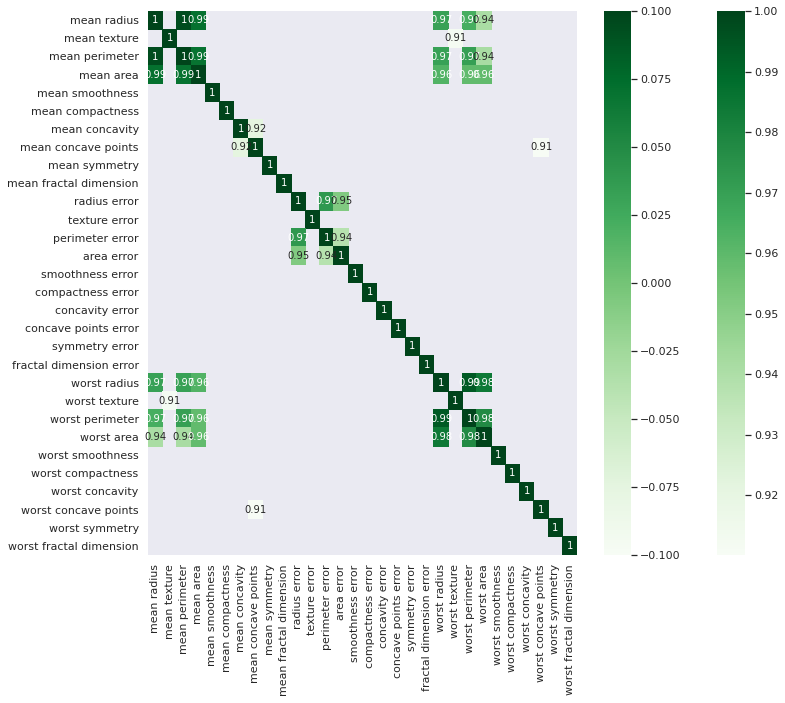

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


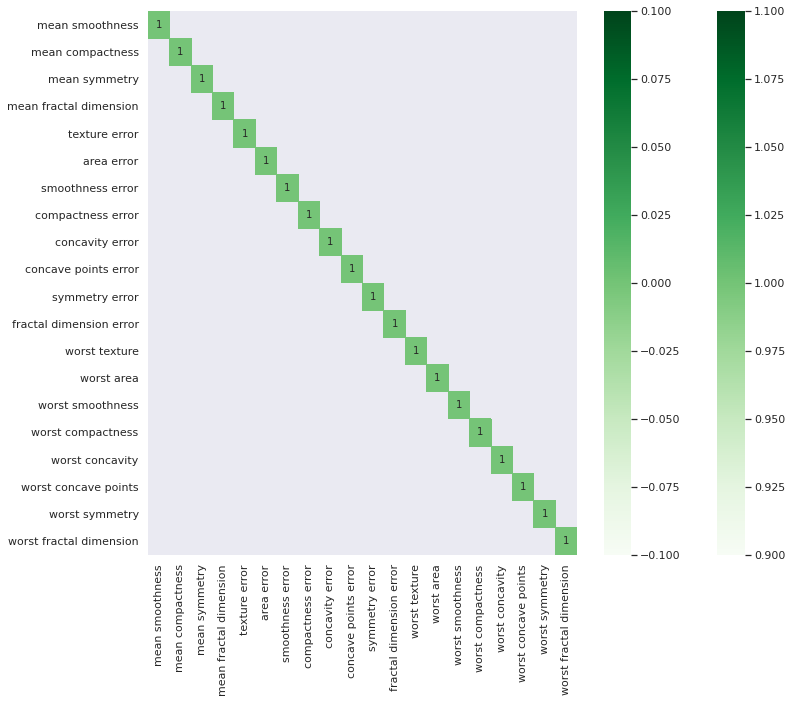

Cantidad de columnas borradas: 10

(455, 20) (455,)
(114, 20) (114,)


In [ ]:
# Usando Cross Validation para los datos con la nueva tabla, ie, vamos a trabajar con la
# tabla que ya eliminamos las columnas que están más correlacionadas.
# En este caso, para ilustrar el ejemplo, tomaremos un nivel de correlacion del 90%


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm


New_data=Correlation_Filtering(df,0.9)
New_data.shape
#Vamos a hacer la prueba del modelo 80-20
X_train, X_test, y_train, y_test = train_test_split(New_data, x.target, test_size=0.20, random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

In [ ]:
# Vamos a evaluar el modelo con un clasificador
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9649122807017544

In [ ]:
from sklearn.model_selection import cross_val_score

def Forward_Selection(X,y,model):
  #Vamos a hacer la prueba del modelo 80-20
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
  #clf = svm.SVC(kernel=model, C=1).fit(X_train, y_train)
  clf=model.fit(X_train,y_train)
  variables=X.shape[1]
  scores = cross_val_score(clf, X_test, y_test, cv=variables)
  print("*******************************************")
  print(model)
  print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
  #print(scores)
  #print(max(scores))
  #Model=np.argmax(scores)+1
  #print("Mejor modelo: {}".format(Model))

In [ ]:
#from sklearn import tree
#clasificadores=["svm.SVC()","tree.DecisionTreeClassifier()"]
#for i in clasificadores:
#  Forward_Selection(New_data,x.target,i)

LR: 0.950985 (0.031697)
LDA: 0.959791 (0.033388)
KNN: 0.909052 (0.064460)
CART: 0.924507 (0.048640)
NB: 0.924754 (0.039713)
SVM: 0.912931 (0.076647)


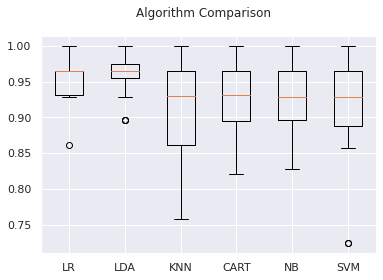

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# prepare configuration for cross validation test harness
seed = 7

models = []
models.append(('LR', LogisticRegression(max_iter=500,random_state=None, solver='lbfgs')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=20, random_state=None)
	cv_results = model_selection.cross_val_score(model, New_data, x.target, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
models[2]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Forward Selection (Algoritmo)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def forward_filtering(X_train, y_train, model, cv):
    '''
    Función que realiza forward selection, ejecutando el modelo con cada variable, 
    utilizando cross-validation
    
    args:
        X_train (matriz): Datos de entrenamiento (Variables de características)
        y_train (vector): Datos de entrenamiento (Variable objetivo)
        model: Unfitted model
        cv (int): Cross-validation splitting
    return:
        Matriz de caracaterísticas con el número de variables que se obtuvo el mejor modelo
    '''
    
    scores = []
    param_decision = 0
    ind = list(range(X_train.shape[1]))
    features = []
    for i in ind:   
        scores.append(cross_val_score(model, X_train[:,i:i+1], y_train, cv=cv).mean())    

    while param_decision < max(scores):
        param_decision = max(scores)
        max_value = ind[scores.index(max(scores))]
        features.append(max_value)
        ind.remove(max_value)
        scores = []
        for i in ind: 
            aux = features.copy()
            aux.append(i)
            scores.append(cross_val_score(model, X_train[:,aux], y_train, cv=cv).mean()) 

    return X_train[:,features]

In [ ]:
# load data
# Load iris data
from sklearn import datasets

iris = datasets.load_iris()

# Create features and target
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

model = RandomForestClassifier(n_estimators=100, n_jobs=-1)

forward_filtering(X_train, y_train, model, 5)

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========